In [8]:
from datetime import datetime
import matplotlib.pyplot as plt
import csv
import os.path
from pathlib import Path
import operator
import time
import numpy as np
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)
    
def days_between_v2(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    d1_unix_time = time.mktime(d1.timetuple())
    d2_unix_time = time.mktime(d2.timetuple())
    flag = 0
    if d1_unix_time <= d2_unix_time:
        flag = 1
    else:
        flag = -1
    return abs((d2 - d1).days) * flag
    
def months_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    year_dif = d2.year - d1.year
    month_dif = d2.month - d1.month
    
    return year_dif * 12 + month_dif

def companyname_2_tickersymbol(company_name):  
    with open('Section3/companylist.csv') as f:
        r = csv.reader(f)
        next(r)
        appendix = ['Company', 'Corporation', ', Inc']
        for item in appendix:
            company_name = company_name.replace(item, '')
        for row in r:
            if company_name in row[1]:
                ticker_symbol = row[0]
                return ticker_symbol.lower()
        
        return None

In [4]:
def companyhiring_stockprice_corr(company_name, ticker_symbol):
    
    with open('Section3/temp_datalab_records_linkedin_company.csv') as f:
        r = csv.reader(f)
        next(r)
        D_employee = {}
        
        for row in r:
            if row[2] == company_name:
                D_employee[row[1]] = int(row[4])
                
        employee_init = min(list(D_employee.keys()))
        employee_end = max(list(D_employee.keys()))
        
    file_path = 'Section3/Data/Stocks/' + ticker_symbol + '.us.txt'
    with open(file_path) as f:
        
        file_text = f.read().split('\n')
        
        D_stock_info_ave = {}
        for row in file_text[1:]:
            row_info = row.split(',')
            if row_info != [''] and days_between_v2(employee_init, row_info[0]) >= 0:
                D_stock_info_ave[row_info[0]] = (float(row_info[2]) + 
                float(row_info[3]))/2.0
                
        stock_init = min(list(D_stock_info_ave.keys()))
        stock_end = max(list(D_stock_info_ave.keys()))
                    
    init_date = max(stock_init, employee_init)
    end_date = min(employee_end, stock_end)
    
    D_employee_date_dif = {}
    D_stock_ave_date_dif = {}
    D_employee_join = {}
    D_stock_ave_join = {}
    for key in D_stock_info_ave.keys():
        if key in D_employee.keys():
            D_employee_date_dif[days_between_v2(init_date, key)]=D_employee[key] 
            D_employee_join[key] = D_employee[key]
            D_stock_ave_date_dif[days_between_v2(init_date, key)]=D_stock_info_ave[key]
            D_stock_ave_join[key] = D_stock_info_ave[key]
            
    employee_list = []
    stock_price_list = []
    days_list = []    
    for i in range(len(D_employee_date_dif)):
        if i in D_employee_date_dif.keys():
            days_list.append(i)
            employee_list.append(D_employee_date_dif[i])
            stock_price_list.append(D_stock_ave_date_dif[i])
            
    employee_norm_list = [x/max(employee_list) for x in employee_list]
    stock_price_norm_list = [x/max(stock_price_list) for x in stock_price_list]
    
    L_employee_month_dif = []
    L_stock_month_dif = []
    
    employee_month_dictlist = [dict() for x in range(months_between(init_date, end_date)+1)]
    stock_month_dictlist = [dict() for x in range(months_between(init_date, end_date)+1)]
    
    for i in D_employee.keys():
        date_time_cur = datetime.strptime(i, "%Y-%m-%d")
        if days_between_v2(init_date, i) < 0 or days_between_v2(end_date, i) > 0 :
            continue
        month_dif = months_between(init_date, i)
        employee_month_dictlist[month_dif][i] = D_employee[i]
        
    for i in D_stock_info_ave.keys():
        date_time_cur = datetime.strptime(i, "%Y-%m-%d")
        if days_between_v2(init_date, i) < 0 or days_between_v2(end_date, i) > 0 :
            continue
        month_dif = months_between(init_date, i)
        stock_month_dictlist[month_dif][i] = D_stock_info_ave[i]
            
    for i in range(len(employee_month_dictlist)):
        earliest_date = min(employee_month_dictlist[i])
        oldest_date = max(employee_month_dictlist[i])
        dif_percent = (employee_month_dictlist[i][oldest_date] - 
        employee_month_dictlist[i][earliest_date])/employee_month_dictlist[i][earliest_date]
        L_employee_month_dif.append(dif_percent)
        
    for i in range(len(stock_month_dictlist)):
        earliest_date = min(stock_month_dictlist[i])
        oldest_date = max(stock_month_dictlist[i])
        dif_percent = (stock_month_dictlist[i][oldest_date] - 
        stock_month_dictlist[i][earliest_date])/stock_month_dictlist[i][earliest_date]
        L_stock_month_dif.append(dif_percent)
           

    correlation_matrix = np.corrcoef(L_employee_month_dif, L_stock_month_dif)
    return correlation_matrix[0][1]

Delphi
Group 1 Automotive
Meritor
Penske Automotive Group
Tata Motors
Dana Incorporated
Lydall
Axalta Coating Systems
Sonic Automotive
Genuine Parts Company
Oshkosh Corporation
AutoZone
Carvana
Ford Motor Company
Superior Industries
Asbury Automotive Group
Tower International
General Motors
AutoNation
Cummins Inc.
KAR Auction Services, Inc
Allison Transmission
BorgWarner Inc.
Lear Corporation
Toyota Motor Corporation
Tenneco
Modine Manufacturing Company
Magna International
Autoliv
{'Delphi': -0.011776121367689697, 'Group 1 Automotive': 0.5664248186597177, 'Penske Automotive Group': 0.20791620692087687, 'Tata Motors': -0.3776412411592262, 'Dana Incorporated': 0.042912628886120914, 'Lydall': -0.12454434209880562, 'Axalta Coating Systems': -0.1395938519240663, 'Sonic Automotive': 0.31137119431694754, 'BorgWarner Inc.': -0.0822652385773843, 'Meritor': 0.2028600163407859, 'AutoZone': 0.19609257421229814, 'Carvana': 0.10558444998074629, 'Oshkosh Corporation': -0.44445544808792287, 'Ford Moto

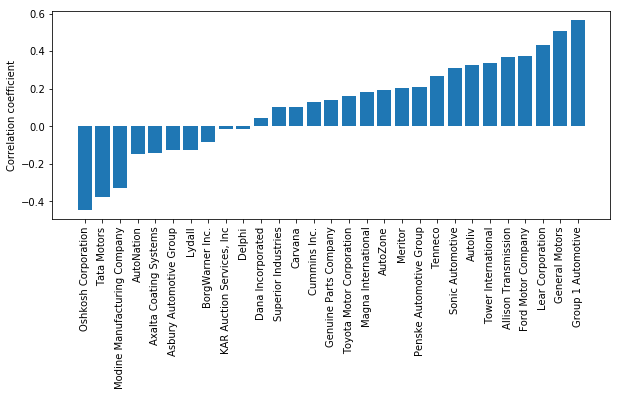

In [11]:
if __name__ == '__main__':
    with open('Section3/temp_datalab_records_linkedin_company.csv') as f:
        r = csv.reader(f)
        next(r)
        automobile_company = []
        for row in r:
            if row[6] == 'Automotive' and row[2] not in automobile_company:
                automobile_company.append(row[2])
    # these companies are excluded for missing data, will be further processed later            
    exception_list = ['Cooper Tire & Rubber Company', 'Donaldson', 'Standard Motor Products', 'Stoneridge']    
    for i in exception_list:
        automobile_company.remove(i)
        
    D_company_ticker = {} 
    stock_dir = 'Section3/Data/Stocks/' 
    for company in automobile_company:
        ticker_symbol = companyname_2_tickersymbol(company)
        if ticker_symbol:
            stock_path = Path(stock_dir + ticker_symbol + '.us.txt')
            if stock_path.is_file():
                D_company_ticker[company] = ticker_symbol
    D_hiring_stock_corr = {}
    for i in D_company_ticker.keys():
        print(i)
        D_hiring_stock_corr[i] = companyhiring_stockprice_corr(i, D_company_ticker[i])
    print(D_hiring_stock_corr)
    
    x_axis = []
    y_axis = []
    
    sorted_corr = sorted(D_hiring_stock_corr.items(), key=operator.itemgetter(1))
    for i in range(len(sorted_corr)):
        x_axis.append(sorted_corr[i][0])
        y_axis.append(sorted_corr[i][1])
    plt.bar(x_axis, y_axis)
    plt.xticks(x_axis, rotation='vertical')
    plt.ylabel('Correlation coefficient')
    plt.subplots_adjust(bottom=0.30)

Text(0,0.5,'Percentage')

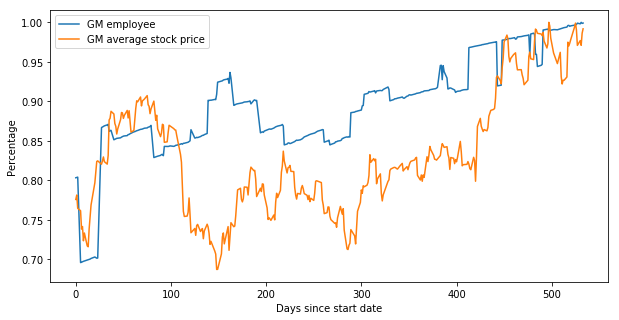

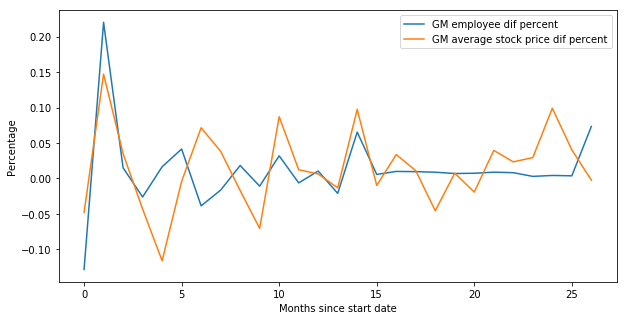

In [13]:
with open('Section3/temp_datalab_records_linkedin_company.csv') as f:
    r = csv.reader(f)
    next(r)
    D_employee = {}
    
    for row in r:
        if row[2] == 'General Motors':
            D_employee[row[1]] = int(row[4])
            
    employee_init = min(list(D_employee.keys()))
    employee_end = max(list(D_employee.keys()))

ticker_symbol = 'gm'
file_path = 'Section3/Data/Stocks/' + ticker_symbol + '.us.txt'
with open(file_path) as f:
    
    file_text = f.read().split('\n')
    
    D_stock_info_ave = {}
    for row in file_text[1:]:
        row_info = row.split(',')
        if row_info != [''] and days_between_v2(employee_init, row_info[0]) >= 0:
            D_stock_info_ave[row_info[0]] = (float(row_info[2]) + 
            float(row_info[3]))/2.0
            
    stock_init = min(list(D_stock_info_ave.keys()))
    stock_end = max(list(D_stock_info_ave.keys()))
                
init_date = max(stock_init, employee_init)
end_date = min(employee_end, stock_end)

D_employee_date_dif = {}
D_stock_ave_date_dif = {}
D_employee_join = {}
D_stock_ave_join = {}
for key in D_stock_info_ave.keys():
    if key in D_employee.keys():
        D_employee_date_dif[days_between_v2(init_date, key)]=D_employee[key] 
        D_employee_join[key] = D_employee[key]
        D_stock_ave_date_dif[days_between_v2(init_date, key)]=D_stock_info_ave[key]
        D_stock_ave_join[key] = D_stock_info_ave[key]
        
employee_list = []
stock_price_list = []
days_list = []    
for i in range(len(D_employee_date_dif)):
    if i in D_employee_date_dif.keys():
        days_list.append(i)
        employee_list.append(D_employee_date_dif[i])
        stock_price_list.append(D_stock_ave_date_dif[i])
        
employee_norm_list = [x/max(employee_list) for x in employee_list]
stock_price_norm_list = [x/max(stock_price_list) for x in stock_price_list]
plt.figure(2)
plot1, = plt.plot(days_list,employee_norm_list)
plot2, = plt.plot(days_list, stock_price_norm_list)
plt.legend([plot1, plot2], ['GM employee','GM average stock price'])
plt.xlabel('Days since start date')
plt.ylabel('Percentage')

L_employee_month_dif = []
L_stock_month_dif = []

employee_month_dictlist = [dict() for x in range(months_between(init_date, end_date)+1)]
stock_month_dictlist = [dict() for x in range(months_between(init_date, end_date)+1)]

for i in D_employee.keys():
    date_time_cur = datetime.strptime(i, "%Y-%m-%d")
    if days_between_v2(init_date, i) < 0 or days_between_v2(end_date, i) > 0 :
        continue
    month_dif = months_between(init_date, i)
    employee_month_dictlist[month_dif][i] = D_employee[i]
    
for i in D_stock_info_ave.keys():
    date_time_cur = datetime.strptime(i, "%Y-%m-%d")
    if days_between_v2(init_date, i) < 0 or days_between_v2(end_date, i) > 0 :
        continue
    month_dif = months_between(init_date, i)
    stock_month_dictlist[month_dif][i] = D_stock_info_ave[i]
        
for i in range(len(employee_month_dictlist)):
    earliest_date = min(employee_month_dictlist[i])
    oldest_date = max(employee_month_dictlist[i])
    dif_percent = (employee_month_dictlist[i][oldest_date] - 
    employee_month_dictlist[i][earliest_date])/employee_month_dictlist[i][earliest_date]
    L_employee_month_dif.append(dif_percent)
    
for i in range(len(stock_month_dictlist)):
    earliest_date = min(stock_month_dictlist[i])
    oldest_date = max(stock_month_dictlist[i])
    dif_percent = (stock_month_dictlist[i][oldest_date] - 
    stock_month_dictlist[i][earliest_date])/stock_month_dictlist[i][earliest_date]
    L_stock_month_dif.append(dif_percent)
       
month_employee = [i for i in range(len(L_stock_month_dif))]
plt.figure(3)
plot3, = plt.plot(month_employee, L_employee_month_dif)
plot4, = plt.plot(month_employee, L_stock_month_dif)
plt.legend([plot3, plot4], ['GM employee dif percent', 'GM average stock price dif percent'])
plt.xlabel('Months since start date')
plt.ylabel('Percentage')